In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Bidirectional, Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
model = Sequential()
model.add(Bidirectional(SimpleRNN(128, input_shape = (x_train.shape[1], x_train.shape[2]))))  # images are split into rows. 28 rows and 28 columns
model.add(Dense(10, activation = 'softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(x_train, y_train, batch_size = 64, epochs = 15, validation_data = (x_test, y_test), verbose = 1)

Epoch 1/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 24s 22ms/step - accuracy: 0.8492 - loss: 0.5046 - val_accuracy: 0.9524 - val_loss: 0.1560
Epoch 2/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.9541 - loss: 0.1518 - val_accuracy: 0.9647 - val_loss: 0.1221
Epoch 3/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9655 - loss: 0.1141 - val_accuracy: 0.9653 - val_loss: 0.1131
Epoch 4/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.9693 - loss: 0.1037 - val_accuracy: 0.9758 - val_loss: 0.0870
Epoch 5/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.9737 - loss: 0.0880 - val_accuracy: 0.9739 - val_loss: 0.0964
Epoch 6/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.9738 - loss: 0.0856 - val_accuracy: 0.9726 - val_loss: 0.0923
Epoch 7/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.9743 - loss: 0.0840 - val_accuracy: 0.9734 - val_loss: 0.0909
Epoch 8/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9779 - loss: 0.0722 - 

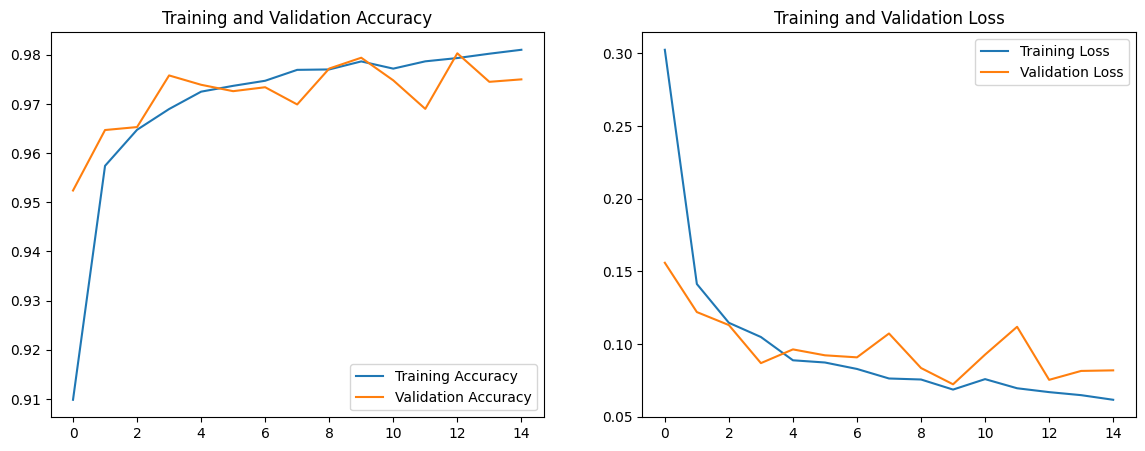

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.savefig('./foo.png')
plt.show()